# Practical Exam (CSC 4780/6780) -- April 25th, 2020 (10:00 AM- 5:00 PM)
## Submit your answers to iCollege. Do not email. Multiple submissions are allowed.

_This is an open book exam. During the exam, you are allowed to use course materials (notes, slides, sample codes, homework assignments) or external resources (such as library documentation or example code pieces). However, you must not get help from any individual, including your peers in this class._


By submitting your answers, you certify that the answers is your own work, based on your personal study and research, and that you have not copied in part or whole or otherwise plagiarised the work of other students and/or persons. You also certify that you have read and understood the class policies and consequences of academic dishonesty as explained in the class website (https://grid.cs.gsu.edu/~baydin2/courses/csc4780/index.html and references/links therein)

## Dataset and Background
Food spectrographs are used in chemometrics to classify food types, a task that has obvious applications in food safety and quality assurance. You are given a time series dataset obtained after spectral analysis of fresh fruit purees [(Holland et al. 1999)](https://doi.org/10.1002/(SICI)1097-0010(199802)76:2%3C263::AID-JSFA943%3E3.0.CO;2-F). The classes are strawberry (authentic samples) and non-strawberry (adulterated strawberries and other fruits) [encoded as `S1` and `S2`]. The dataset contains 983 time series instances. Each timseries has a length of 235. Note here that time series are stored in the rows. The data can be read from `Strawberry_TS.csv` (therefore, place it in the same directory as this starter code). In this practical exam, you will explore this data and build predictive models. Note here that while the specifics and details of data is given for completeness, they are not relevant for the exam.

The values of time series are represented in the cells corresponding to columns $\{t0, t1, ... t234\}$.
The `index` is the identifier of the instances. The `Class` column shows the class of time series and is your target variable. 


In [3]:
# run the below code to load time series dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ts_df = pd.read_csv('Strawberry_TS.csv', index_col=0)
ts_df_c = ts_df.copy()

# ts_df
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, ins0 to ins982
Columns: 236 entries, Class to t234
dtypes: float64(235), object(1)
memory usage: 1.8+ MB


## Question 1 (15 points)
Your first task is to create an analytics base table from the given time series dataset.
The dataset will contain simple statistical features of time series. Those features are the following: 
- mean (column: mean)
- standard deviation (column: std)
- minimum (column: min)
- 1st quartile (column: Q1)
- median (column: median)
- 3rd quartile (column: Q3)
- maximum (column: max)
- interquartile range (column: IQR)

You will also need to fetch the target variable to `class` column.

Below, a pandas DataFrame object (`abt`) is created for you (dimensions: __983 rows × 9 columns__) with proper index and column names. Feel free to use it. 
In the end, you will have 983 instances with eight descriptive features and a target variable.

In [4]:
ts_df_c.head(10)

,Class,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234
ins0,S2,-0.427551,-0.423887,-0.414360,-0.387491,-0.330333,-0.275372,-0.248747,-0.253633,-0.279036,...,-0.966893,-0.991564,-1.009640,-1.019899,-1.027960,-1.031868,-1.034066,-1.035776,-1.037486,-1.039440
ins1,S2,-0.313815,-0.313110,-0.299480,-0.266110,-0.221460,-0.162945,-0.123230,-0.124875,-0.151665,...,-0.948080,-0.961945,-0.974400,-0.984740,-0.989675,-0.994140,-0.994375,-0.994610,-0.998370,-0.998370
ins2,S1,-0.439104,-0.432493,-0.431269,-0.408253,-0.351938,-0.288032,-0.255957,-0.261344,-0.278238,...,-0.991974,-1.007889,-1.020621,-1.029191,-1.033353,-1.035802,-1.036291,-1.037026,-1.039964,-1.039964
ins3,S2,-0.399509,-0.385600,-0.362244,-0.322354,-0.254122,-0.179591,-0.121331,-0.096137,-0.113458,...,-1.059527,-1.079210,-1.091019,-1.097317,-1.102566,-1.105978,-1.111489,-1.115950,-1.115425,-1.115425
ins4,S2,-0.497904,-0.502622,-0.511010,-0.494234,-0.461208,-0.441287,-0.453344,-0.489254,-0.522018,...,-0.927249,-0.947694,-0.971547,-0.994089,-1.020300,-1.045463,-1.065908,-1.086615,-1.102342,-1.102342
ins5,S2,-0.381229,-0.366128,-0.339350,-0.290424,-0.211095,-0.121296,-0.059483,-0.042973,-0.063108,...,-0.856197,-0.831029,-0.841096,-0.862237,-0.864250,-0.871096,-0.853982,-0.842304,-0.852170,-0.852170
ins6,S2,-0.656345,-0.661480,-0.669823,-0.661159,-0.616875,-0.567778,-0.554300,-0.567778,-0.587994,...,-1.183256,-1.239092,-1.283055,-1.309368,-1.329264,-1.343062,-1.351406,-1.357823,-1.363279,-1.365525
ins7,S2,-0.462186,-0.463170,-0.458496,-0.444719,-0.415689,-0.391333,-0.390349,-0.412736,-0.441520,...,-0.826293,-0.844745,-0.865410,-0.889766,-0.920026,-0.951271,-0.979071,-1.006379,-1.027537,-1.027537
ins8,S2,-0.773981,-0.784344,-0.785347,-0.752587,-0.701442,-0.650965,-0.623888,-0.628903,-0.651299,...,-1.209550,-1.274067,-1.329892,-1.360980,-1.383043,-1.398420,-1.407111,-1.414799,-1.419145,-1.419145
ins9,S2,-0.449364,-0.414283,-0.368315,-0.304202,-0.218073,-0.117427,-0.026218,0.022412,0.016847,...,-0.972671,-0.989606,-1.004365,-1.013074,-1.018639,-1.022268,-1.024203,-1.026865,-1.028558,-1.028558


In [5]:
ts_df_c.shape

(983, 236)

In [6]:
abt = pd.DataFrame(index = ts_df.index, columns = ['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR', 'class'])

# your code for extracting features goes here!



In [7]:
#Finding Mean of the row values

abt['mean']=ts_df_c.mean(axis=1)

In [8]:
#Finding Standard deviation of the row values

abt['std']=np.std(ts_df_c,axis=1)

In [9]:
#Finding Minimum of the row values

abt['min']=ts_df_c.min(axis=1)

In [10]:
#Finding Q1 of the row values

abt['Q1']=ts_df_c.quantile(0.25,axis=1)

In [11]:
#Finding Median of the row values

abt['median']=ts_df_c.median(axis=1)

In [12]:
#Finding Q3 of the row values

abt['Q3']=ts_df_c.quantile(0.75,axis=1)

In [13]:
#Finding Maximum of the row values

abt['max']=ts_df_c.max(axis=1)

In [14]:
#Finding Interquantile Range for row values

abt['IQR']=abt['Q3']-abt['Q1']

In [15]:
#Assigning Class value

abt['class']=ts_df_c['Class']

In [16]:
abt.head(10)

,mean,std,min,Q1,median,Q3,max,IQR,class
ins0,3.225531e-10,0.99787,-1.039440,-0.847324,-0.079959,0.181530,3.118721,1.028854,S2
ins1,9.021287e-11,0.99787,-1.347345,-0.824117,-0.098085,0.152777,3.232569,0.976895,S2
ins2,8.476597e-10,0.99787,-1.039964,-0.821069,-0.089460,0.176569,3.181970,0.997638,S1
ins3,1.140000e-09,0.99787,-1.115950,-0.827143,-0.131828,0.141495,3.193192,0.968638,S2
ins4,-1.282553e-09,0.99787,-1.102342,-0.819913,0.041268,0.251878,3.023882,1.071791,S2
ins5,6.485107e-10,0.99787,-1.039217,-0.802941,-0.123510,0.108436,3.617034,0.911378,S2
ins6,9.127661e-10,0.99787,-1.365525,-0.848080,0.000208,0.374532,2.980046,1.222613,S2
ins7,3.944680e-10,0.99787,-1.053614,-0.853232,-0.003116,0.230971,3.054648,1.084203,S2
ins8,-6.136171e-10,0.99787,-1.419145,-0.849529,0.051361,0.417567,2.898107,1.267096,S2
ins9,9.174470e-10,0.99787,-1.029284,-0.862711,-0.093718,0.090637,3.017820,0.953348,S2


In [17]:
abt.shape

(983, 9)

In [18]:
desc_features=abt.columns.values
desc_features=np.delete(desc_features,8)
desc_features

array(['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR'],
      dtype=object)

In [19]:
target_feature='class'
target_feature

'class'

<font color=red>**Next three questions will use the analytical base table (ABT) created in Question 1. For those who want to skip to Questions 2-4, they can load a sample ABT (`sampleABT.csv`).** </font>

## Question 2 (30 points)

Using the dataset (i.e., analytical base table) you created in **Question 1**, analyze and interpret the relationships between the descriptive features and target feature. In this question you are expected to create 
1. a bar plot demonstrating the distribution of the target variable (see `class` column in `abt`) (**5 points**)
2. the correlation matrix of descriptive features (**5 points**)
3. a scatter plot matrix for descriptive features and target feature (Hint: `sns.pairplot`, also use the `hue` for answering the question) (**5 points**)

**Q2.1** After creating (1), answer the following questions:
- Is this dataset balanced? What is the class imbalance ratio (i.e., the ratio between the number of instances in majority class and the number of instances in minority class?) (**3 points**)
- If imbalanced, what can we do to balance the dataset? (**3 points**)

**Q2.2** After creating (2), answer the following questions:
- Among the pairs of descriptive features in correlation matrix, which two has the highest correlation? (**2 points**)
- Among the pairs of descriptive features in correlation matrix, which two has the lowest (negative) correlation? (**2 points**)

**Q2.3** After creating (3), answer the following questions:
- Based on your scatter plot matrix, which features are less likely to be important for predicting the target variable and why? (**5 points**)

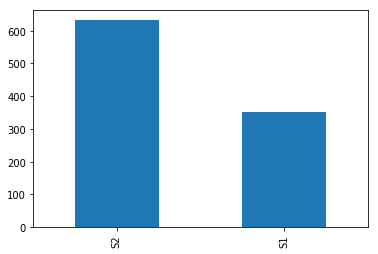

In [20]:
#Q2.1 Bar plot showing the distribution of target variable

abt['class'].value_counts().plot(kind="bar")

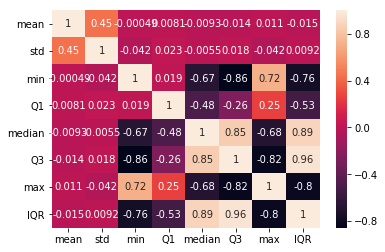

In [21]:
#Q2.2 Correlation matrix of descriptive features

corrMatrix=abt[desc_features].corr()
sns.heatmap(corrMatrix,annot=True)

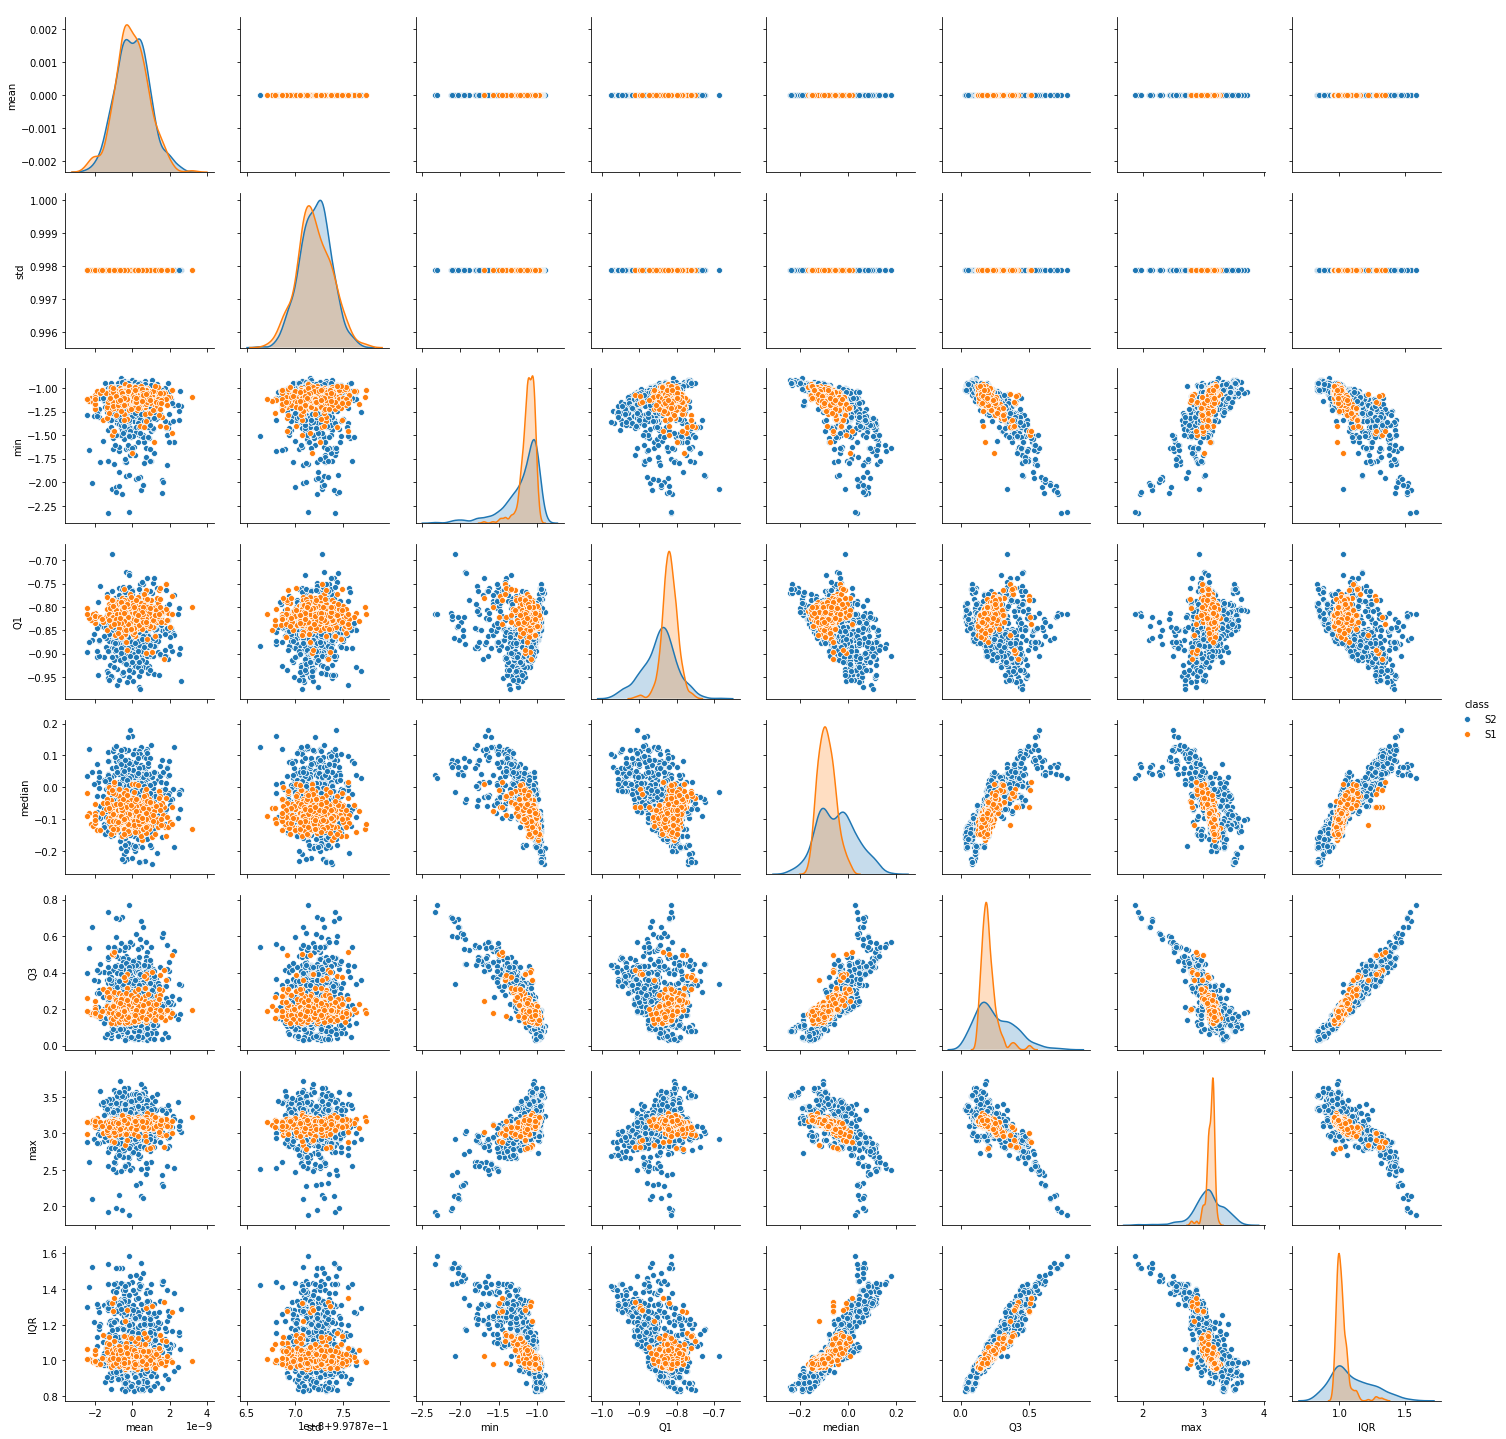

In [22]:
#Q2.3 Scatter plot matrix for features

sns.pairplot(abt, hue='class')
plt.show();

In [23]:
#Q2.1.1 Is this dataset balanced? What is the class imbalance ratio (i.e., the ratio between the number of instances in majority class and the number of instances in minority class?)


#Answer: This dataset is not balanced. 
total=len(abt)
total=int(total)
s2,s1=abt['class'].value_counts()
s2_ratio=s2/total
s1_ratio=s1/total
print("The Class imbalance ratio between S1 and S2 are:")
print(s1_ratio)
print(s2_ratio)
print("Since this is in 0.36:0.64 ratio, this dataset is not balanced")

The Class imbalance ratio between S1 and S2 are:
0.3570701932858596
0.6429298067141404
Since this is in 0.36:0.64 ratio, this dataset is not balanced


We can do UNDERSAMPLING to randomly delete some of the observations in majority class to match the count of minority class


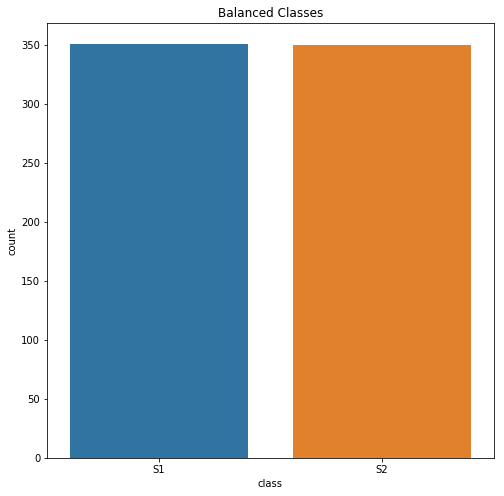

In [24]:
#Q2.1.2 If imbalanced, what can we do to balance the dataset?

print("We can do UNDERSAMPLING to randomly delete some of the observations in majority class to match the count of minority class")
abt_copy=abt.copy()

shuffled_df = abt_copy.sample(frac=1,random_state=4)
minority_class_s1 = shuffled_df.loc[shuffled_df['class'] == 'S1']

majority_class_s2 = shuffled_df.loc[shuffled_df['class'] == 'S2'].sample(n=350,random_state=42)

normalized_df = pd.concat([minority_class_s1, majority_class_s2])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('class', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [25]:
#Q2.2.1 Among the pairs of descriptive features in correlation matrix, which two has the highest correlation? (2 points)

corrMatrix=abt[desc_features].corr()
corrMatrix

,mean,std,min,Q1,median,Q3,max,IQR
mean,1.000000,0.447730,-0.000486,0.008106,-0.009276,-0.014188,0.011035,-0.014901
std,0.447730,1.000000,-0.042358,0.023336,-0.005467,0.018353,-0.041565,0.009234
min,-0.000486,-0.042358,1.000000,0.019478,-0.665050,-0.858368,0.716253,-0.761679
Q1,0.008106,0.023336,0.019478,1.000000,-0.483945,-0.260754,0.253186,-0.526532
median,-0.009276,-0.005467,-0.665050,-0.483945,1.000000,0.848735,-0.680219,0.891100
Q3,-0.014188,0.018353,-0.858368,-0.260754,0.848735,1.000000,-0.824715,0.958040
max,0.011035,-0.041565,0.716253,0.253186,-0.680219,-0.824715,1.000000,-0.801434
IQR,-0.014901,0.009234,-0.761679,-0.526532,0.891100,0.958040,-0.801434,1.000000


In [26]:
#Answer for Q2.2.1
print("Q3 and IQR are highly correlated")
print("Median and IQR are highly correlated")

Q3 and IQR are highly correlated
Median and IQR are highly correlated


In [27]:
#Answer for Q2.2.2
print("Q3 and min are negatively correlated")
print("Q3 and max are negatively correlated")

Q3 and min are negatively correlated
Q3 and max are negatively correlated


In [28]:
#Q2.3 Based on your scatter plot matrix, which features are less likely to be important for predicting the target variable and why?

print("Max,IQR are the least important features in the dataset. Because we couldnt see the class partition clearly.")

Max,IQR are the least important features in the dataset. Because we couldnt see the class partition clearly.


# Question 3 (20+5 points)

Using the dataset (`abt`) you created in **Question 1**, create a logistic regression model. Your target feature is `class`, while your descriptive features are `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. (Hint: the model's class is imported in the preamble as 

`from sklearn.linear_model import LogisticRegression` 

and you can use the default model [without any input parameters]. Use 50% holdout sampling for evaluating this model.  (**8 pts**)

After you train your logistic regression model, test the performance of your model using your test set. 
When evaluating the model, you are expected to report the confusion matrix (**3 pts**), overall classification error [misclassification rate] (**3 pts**), the precision of the class `S1` (**3 pts**) and the recall of the class `S2` (**3 pts**). 

**Bonus Question** Output the classification accuracy and F1-score. Compare the similarities and differences between these two measures. Explain the reasons behind these similarities or differences. (**5 pts**)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# your answer goes here
x=abt[desc_features]
y=abt[target_feature]

#Split train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

#Train the model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

#Predict the model
predictions = logisticRegr.predict(x_test)


In [42]:
##Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[  0 171]
 [ 28 293]]


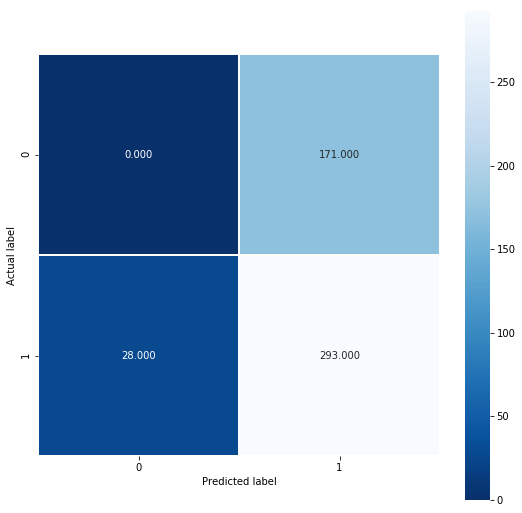

In [46]:
#Confusion Matrix using Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [57]:
#Overall Classification Error

FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
TN=cm[0,0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("Overall Classification Error:")
print(classification_error)

Overall Classification Error:
0.40447154471544716


In [50]:
#the precision of the class S1
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=predictions, pos_label='S1'))

Precision: 0.000


In [49]:
#recall of the class S2
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=predictions, pos_label='S2'))

Recall: 0.913


In [ ]:
# your answer to bonus question goes here

In [79]:
#Classification Accuracy # accuracy: (tp + tn) / (p + n)
print("Accuracy score is")
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, predictions))

Accuracy score is
0.5955284552845529
0.5955284552845529


In [78]:
#F1 score # f1: 2 tp / (2 tp + fp + fn)
print("F1 score is")
print((TP + TP) / float(TP + TP + FP + FN))

F1 score is
0.7464968152866241


In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          S1       0.00      0.00      0.00       171
          S2       0.63      0.91      0.75       321

    accuracy                           0.60       492
   macro avg       0.32      0.46      0.37       492
weighted avg       0.41      0.60      0.49       492



In [80]:
#Similarity or Difference between accuracy and f1 score

print("Accuracy - Used when True Positives and True Negatives are important")
print("f1 score - Used when False Positives and False Negatives are important")

print("Accuracy score here is 0.60 which means the model is 60% accurate")
print("If the f1 score is good, then we have very less False positives and less False nagatives. Here we have 75% which is good")

print("So Accuracy and f1 score are different. Accuracy deals with True values and f1 score deals with False values")

Accuracy - Used when True Positives and True Negatives are important
f1 score - Used when False Positives and False Negatives are important
Accuracy score here is 0.60 which means the model is 60% accurate
If the f1 score is good, then we have very less False positives and less False nagatives. Here we have 75% which is good
So Accuracy and f1 score are different. Accuracy deals with True values and f1 score deals with False values


## Question 4 (35+5 points)

In this part, you are expected to create a set of random forest models to understand the impact of the estimator count (i.e., number of weak learners) in these ensemble models. You will again be using the dataset (`abt`) created in **Question 1**. Similar to **Question 3**, the target feature is `class`, and you are expected to use all the descriptive features, i.e., `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. 

More specifically, the task here is to build random forest classifiers (`RandomForestClassifier` in scikit-learn) under six different parametric settings where number of estimators ($n$) is set to a number from `[1, 10, 50, 100, 500, 1000]`. This means that for every $n$ in the list, you need to repeat the experiment. Feel free to use the `cv_scores` given in the preamble.

Each experiment will use an 8-fold cross validation evaluation schema. For each value of the $n$ parameter, report the mean and the standard deviation of classification accuracies. (Hint: `RandomForestClassifier` uses the parameter `n_estimators` for setting the number of estimators to be built.) (**35 points**)

**Bonus Question** Demonstrate the distributions of classification accuracies for different $n$'s using a box plot. Which $n$ would you pick to train your deployment model as the number of estimators based on the box plots? (**5 pts**)

In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_scores = pd.DataFrame(index=['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8'], 
                      columns=[1, 10, 50, 100, 500, 1000]) # columns represent number of estimators
estimators=[1,10,50,100,500,1000]
cv_meanstd = pd.DataFrame(index=['mean','std'],columns=estimators)
cv_accuracy = pd.DataFrame(index=['accuracy'],columns=estimators)
# your answer goes here

x=abt[desc_features]
y=abt[target_feature]

#Split train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#Build RandomForest Model
for i in range(0,6):
    rfc = RandomForestClassifier(n_estimators=estimators[i],random_state=0)
    #8 fold Cross validation
    cv1 = cross_validate(rfc, x, y, cv=8)
    cv_scores[estimators[i]]=cv1['test_score']
    #Saving mean and standard deviation of classification accuracies in a dataframe
    cv_meanstd[estimators[i]]=[np.mean(cross_val_score(rfc, x, y, cv=8)),np.std(cross_val_score(rfc, x, y, cv=8))]
    #saving accuracy score in a dataframe for bonus question
    accuracy=cross_val_score(rfc, x, y,scoring='accuracy',cv=8)
    cv_accuracy[estimators[i]]=[accuracy.mean()*100]

In [157]:
cv_scores

,1,10,50,100,500,1000
fold1,0.878049,0.886179,0.886179,0.886179,0.894309,0.894309
fold2,0.788618,0.926829,0.894309,0.918699,0.910569,0.910569
fold3,0.845528,0.894309,0.894309,0.902439,0.910569,0.902439
fold4,0.861789,0.934959,0.943089,0.943089,0.943089,0.934959
fold5,0.796748,0.886179,0.869919,0.886179,0.869919,0.886179
fold6,0.796748,0.910569,0.902439,0.902439,0.910569,0.902439
fold7,0.845528,0.934959,0.934959,0.934959,0.943089,0.943089
fold8,0.811475,0.893443,0.909836,0.909836,0.901639,0.901639


In [158]:
cv_meanstd

,1,10,50,100,500,1000
mean,0.828060,0.908428,0.904380,0.910477,0.910469,0.909453
std,0.031699,0.019890,0.022882,0.019497,0.022671,0.018418


In [159]:
# answer to bonus question goes here
 
cv_accuracy #Shows the average of accuracies 

,1,10,50,100,500,1000
accuracy,82.806044,90.84283,90.437991,91.047748,91.046915,90.945289


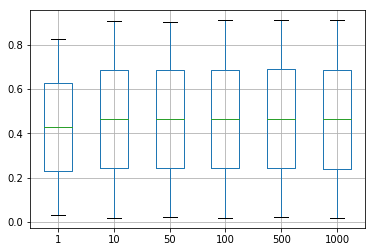

In [163]:
cv_meanstd.boxplot()

In [164]:
print("As we can see from the box plot representation, the accuracy value remains close to similar for estimators 10,50,100,1000. We will choose 100 estimators as it has the highest accuracy. We can even select 10 since it doesnt have much differnce with 100, but selecting very less estimators might not give good predictions.")

As we can see from the box plot representation, the accuracy value remains close to similar for estimators 10,50,100,1000. We will choose 100 estimators as it has the highest accuracy. We can even select 10 since it doesnt have much differnce with 100, but selecting very less estimators might not give good predictions.

